# E-commerce Customer Segmentation

### Abstract
A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on. 
### Problem Statement
Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.

### Dataset Information
The data was collected from a well known e-commerce website over a period of time based on the customer’s search profile.
### Variable Description
* __Cust_ID__ : Unique numbering for customers
* __Gender__ : Gender of the customer
* __Orders__ : Number of orders placed by each customer in the past

__Remaining 35 features (brands) contains the number of times customers have searched them__

# Assigning working directory

In [1]:
import os
os.chdir('C:/Users/Darshan/Desktop/Customer_segmentation_project/')

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [4]:
df = pd.read_excel('C:/Users/Darshan/Desktop/Customer_segmentation_project/Dataset/cust_data.xlsx')

In [5]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [6]:
df.shape

(30000, 38)

# Basic commands

In [7]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
Orders,30000.0,4.169800,3.590311,0.0,1.00,4.0,7.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.0,0.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.0,0.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.0,0.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.0,0.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.0,0.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.0,0.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.0,0.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.0,0.00,16.0


In [10]:
df.shape

(30000, 38)

In [11]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

# Exploratory Data Analysis (EDA)

### Important functions

In [12]:
def find_proportion(col, data):
    for ind, i in enumerate(df[col].value_counts().index):
        print(f'Proportion of {i}: ',round(df[col].value_counts().iloc[ind]/len(data[col]), 4) * 100, '%')

In [13]:
zero = {}

In [14]:
df.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

#### Gender

In [15]:
df.Gender.head()

0      M
1      F
2      M
3      F
4    NaN
Name: Gender, dtype: object

In [16]:
df.Gender.value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

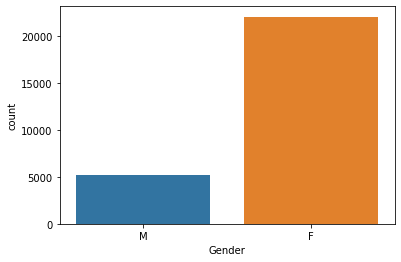

In [17]:
sns.countplot(df.Gender)

In [18]:
# Most of the customers are females

In [19]:
find_proportion('Gender', df)

Proportion of F:  73.50999999999999 %
Proportion of M:  17.41 %


<AxesSubplot:xlabel='Gender', ylabel='Orders'>

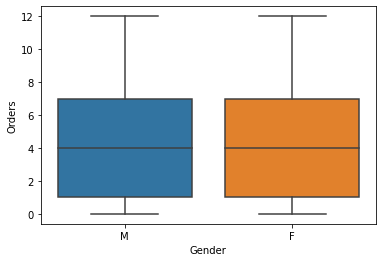

In [20]:
sns.boxplot(df.Gender, df.Orders)

In [21]:
df.groupby('Gender').mean()['Orders']

Gender
F    4.231115
M    4.301800
Name: Orders, dtype: float64

In [22]:
# Both Male and Female customers ordered on an average 4 products in the past.

In [23]:
df.groupby('Gender').max()['Orders']

Gender
F    12
M    12
Name: Orders, dtype: int64

In [24]:
# The maximum orders placed by both Male and Female customers is 12

In [25]:
df.groupby('Gender').min()['Orders']

Gender
F    0
M    0
Name: Orders, dtype: int64

In [26]:
# The minimum orders placed by both Male and Female customers is 0

#### Orders

In [27]:
df.Orders.head()

0     7
1     0
2     7
3     0
4    10
Name: Orders, dtype: int64

In [28]:
df.Orders.value_counts()

0     7294
1     2716
2     2422
7     2207
3     2199
4     2192
8     2080
6     2039
5     2010
9     1993
10    1938
12     469
11     441
Name: Orders, dtype: int64

In [29]:
# The number of total orders ranges from 0 to 12.

<AxesSubplot:xlabel='Orders', ylabel='count'>

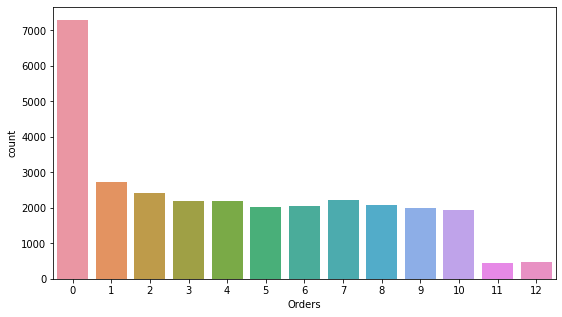

In [30]:
plt.figure(figsize=(9,5))
sns.countplot(df.Orders)

Text(0, 0.5, 'Counts')

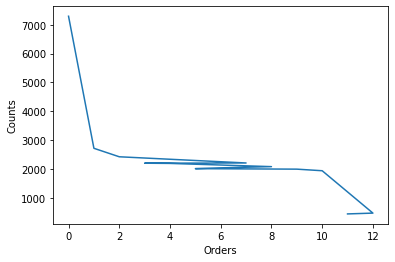

In [31]:
df.Orders.value_counts().plot(kind='line')
plt.xlabel('Orders')
plt.ylabel('Counts')

In [32]:
# Most of the orders are from 0 category, which means most customers did not order any products in the past.

# As the number of products increases, the number of customers who bought it decreases.

In [33]:
df[df.Orders>10].Gender.value_counts()

F    661
M    185
Name: Gender, dtype: int64

In [34]:
# The number of customers who bought more than 10 orders are also dominated by Females.

<AxesSubplot:xlabel='Orders'>

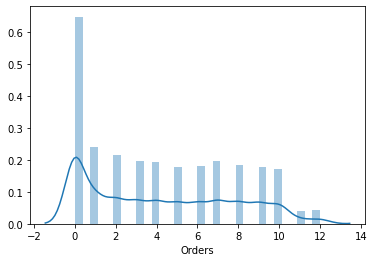

In [35]:
sns.distplot(df.Orders)

In [36]:
df.Orders.value_counts()

0     7294
1     2716
2     2422
7     2207
3     2199
4     2192
8     2080
6     2039
5     2010
9     1993
10    1938
12     469
11     441
Name: Orders, dtype: int64

In [37]:
df['Order_cat'] = df['Orders']

In [38]:
df.Order_cat.unique()

array([ 7,  0, 10,  4,  6,  9,  1,  8,  5,  3,  2, 11, 12], dtype=int64)

In [39]:
# Lets create a new column from Orders column based on the number of orders a customer made.

df = df.replace({'Order_cat': {
    0 : '0 order',
    1 : '1 to 6 orders',
    2 : '1 to 6 orders',
    3 : '1 to 6 orders',
    4 : '1 to 6 orders',
    5 : '1 to 6 orders',
    6 : '1 to 6 orders',
    7 : '7 to 12 orders',
    8 : '7 to 12 orders',
    9 : '7 to 12 orders',
    10 : '7 to 12 orders',
    11 : '7 to 12 orders',
    12 : '7 to 12 orders'
}})

In [40]:
df['Order_cat'].value_counts()

1 to 6 orders     13578
7 to 12 orders     9128
0 order            7294
Name: Order_cat, dtype: int64

In [41]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Order_cat
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7 to 12 orders
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0 order
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7 to 12 orders
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 order
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,7 to 12 orders


(array([0, 1, 2]),
 [Text(0, 0, '7 to 12 orders'),
  Text(1, 0, '0 order'),
  Text(2, 0, '1 to 6 orders')])

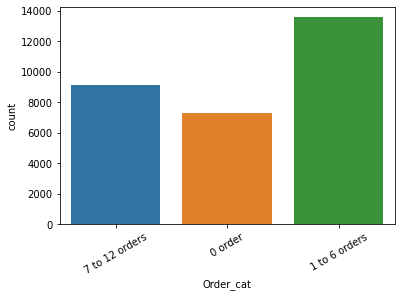

In [42]:
sns.countplot(df.Order_cat)
plt.xticks(rotation=30)

#### Jordan

In [43]:
df.Jordan.head()

0    0
1    0
2    0
3    0
4    0
Name: Jordan, dtype: int64

In [44]:
df.Jordan.value_counts()

0     25188
1      3099
2       996
3       371
4       166
5        86
6        41
7        19
8        12
9         8
10        5
11        3
12        3
22        1
24        1
13        1
Name: Jordan, dtype: int64

In [45]:
print(f'Out of {len(df)} customers, {len(df[df.Jordan>0])} of them searched Jordan')

Out of 30000 customers, 4812 of them searched Jordan


<AxesSubplot:xlabel='Jordan', ylabel='count'>

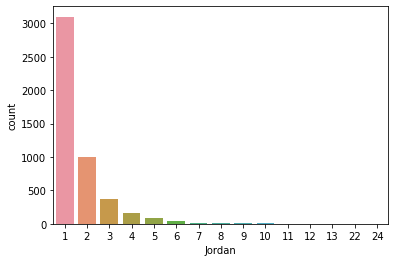

In [46]:
sns.countplot(df[df.Jordan>0].Jordan)

In [47]:
df[df.Jordan>0].groupby('Gender').mean()['Jordan']

Gender
F    1.674894
M    1.643071
Name: Jordan, dtype: float64

In [48]:
# On an average Male and Female customers searched 1.6 (1-2) times the products of Jordan

In [49]:
# Customers who searched more than or equal to 10 Jordan products are: 

df[df.Jordan>9].Cust_ID.values

array([   97,   195,   524,  5414,  8448,  8512,  8738, 15502, 15790,
       17984, 18236, 22990, 25803, 28100], dtype=int64)

In [50]:
df.groupby('Order_cat').count()['Jordan']

Order_cat
0 order            7294
1 to 6 orders     13578
7 to 12 orders     9128
Name: Jordan, dtype: int64

In [51]:
# Customers who previously havent ordered any products have serched Jordan 7,294 times
# Customers who previously ordered 1 to 6 products have searched Jordan 13,578 times
# And customers who previously orderd 7 to 12 products have searched Jordan 9,128 times

In [52]:
# The customer(s) who searched for Jordan the most is

df.iloc[df.Jordan.argmax()]

Cust_ID                            8512
Gender                                F
Orders                                3
Jordan                               24
Gatorade                              0
Samsung                               0
Asus                                  0
Udis                                  0
Mondelez International                0
Wrangler                              0
Vans                                  0
Fila                                  0
Brooks                                0
H&M                                   0
Dairy Queen                           0
Fendi                                 0
Hewlett Packard                       0
Pladis                                0
Asics                                 1
Siemens                               0
J.M. Smucker                          0
Pop Chips                             0
Juniper                               0
Huawei                                0
Compaq                                0


In [53]:
# Customer 8512 searched for Jordan 24 times and she previously ordered 3 items.

In [54]:
find_proportion('Jordan', df)

Proportion of 0:  83.96000000000001 %
Proportion of 1:  10.33 %
Proportion of 2:  3.32 %
Proportion of 3:  1.24 %
Proportion of 4:  0.5499999999999999 %
Proportion of 5:  0.29 %
Proportion of 6:  0.13999999999999999 %
Proportion of 7:  0.06 %
Proportion of 8:  0.04 %
Proportion of 9:  0.03 %
Proportion of 10:  0.02 %
Proportion of 11:  0.01 %
Proportion of 12:  0.01 %
Proportion of 22:  0.0 %
Proportion of 24:  0.0 %
Proportion of 13:  0.0 %


In [55]:
# 83.96% of customers haven't searched for the products of Jordan

In [56]:
zero['Jordan'] = 83.96

#### Gatorade

In [57]:
df.Gatorade.value_counts()

0     25050
1      3390
2       971
3       353
4       123
5        51
6        28
7        22
8         7
9         2
10        1
11        1
15        1
Name: Gatorade, dtype: int64

<AxesSubplot:xlabel='Gatorade', ylabel='count'>

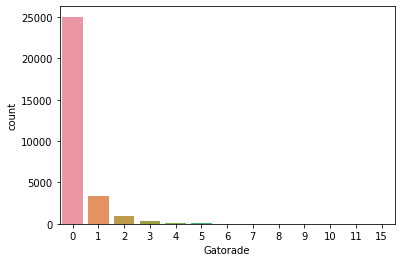

In [58]:
sns.countplot(df.Gatorade)

In [59]:
# Lets see if Male customers or Female customers prefer Gatorade

df[df.Gatorade>0].groupby('Gender').mean()['Gatorade']

Gender
F    1.422340
M    1.822568
Name: Gatorade, dtype: float64

In [60]:
# On an average Male customers searched 1.8 (close to 2) times and female customers searched 1.4 times the products of Gatorade.

In [61]:
df.groupby('Order_cat').mean()['Gatorade']

Order_cat
0 order           0.199616
1 to 6 orders     0.266534
7 to 12 orders    0.273335
Name: Gatorade, dtype: float64

In [62]:
find_proportion('Gatorade', df)

Proportion of 0:  83.5 %
Proportion of 1:  11.3 %
Proportion of 2:  3.2399999999999998 %
Proportion of 3:  1.18 %
Proportion of 4:  0.41000000000000003 %
Proportion of 5:  0.16999999999999998 %
Proportion of 6:  0.09 %
Proportion of 7:  0.06999999999999999 %
Proportion of 8:  0.02 %
Proportion of 9:  0.01 %
Proportion of 10:  0.0 %
Proportion of 11:  0.0 %
Proportion of 15:  0.0 %


In [63]:
zero['Gatorade'] = 83.5

<AxesSubplot:xlabel='Jordan', ylabel='Gatorade'>

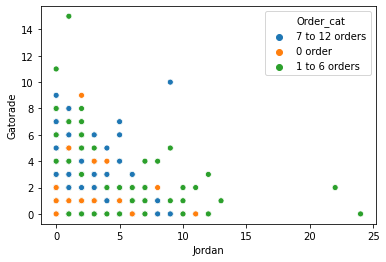

In [64]:
# Lets see the customers who searched or did not search Jordan and Gatorade

sns.scatterplot(df.Jordan, df.Gatorade, hue=df.Order_cat)

#### Samsung

In [65]:
df.Samsung.value_counts()

0     26900
1      1685
2       635
3       279
4       191
5       107
6        77
7        47
8        33
9        11
10       11
12        8
11        7
13        2
14        2
22        1
16        1
26        1
27        1
15        1
Name: Samsung, dtype: int64

<AxesSubplot:xlabel='Samsung', ylabel='count'>

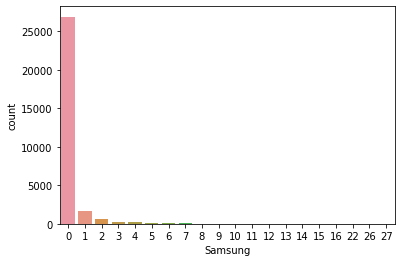

In [66]:
sns.countplot(df.Samsung)

In [67]:
df[df.Samsung>0].groupby('Gender').mean()['Samsung']

Gender
F    2.151643
M    2.159449
Name: Samsung, dtype: float64

In [68]:
# On an average both male and female customers searched 2.15 times the products from Samsung

In [69]:
df.groupby('Order_cat').mean()['Samsung']

Order_cat
0 order           0.181930
1 to 6 orders     0.238621
7 to 12 orders    0.232362
Name: Samsung, dtype: float64

In [70]:
find_proportion('Samsung', df)

Proportion of 0:  89.67 %
Proportion of 1:  5.62 %
Proportion of 2:  2.12 %
Proportion of 3:  0.9299999999999999 %
Proportion of 4:  0.64 %
Proportion of 5:  0.36 %
Proportion of 6:  0.26 %
Proportion of 7:  0.16 %
Proportion of 8:  0.11 %
Proportion of 9:  0.04 %
Proportion of 10:  0.04 %
Proportion of 12:  0.03 %
Proportion of 11:  0.02 %
Proportion of 13:  0.01 %
Proportion of 14:  0.01 %
Proportion of 22:  0.0 %
Proportion of 16:  0.0 %
Proportion of 26:  0.0 %
Proportion of 27:  0.0 %
Proportion of 15:  0.0 %


In [71]:
zero['Samsung'] = 89.67

#### Asus

In [72]:
df.Asus.value_counts()

0     27597
1      1389
2       466
3       219
4       126
5        72
6        50
7        32
8        19
9        10
10        9
11        4
12        2
15        2
17        1
13        1
14        1
Name: Asus, dtype: int64

<AxesSubplot:xlabel='Asus', ylabel='count'>

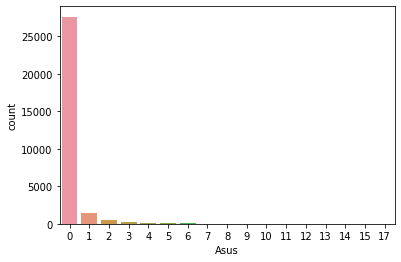

In [73]:
sns.countplot(df.Asus)

In [74]:
df[df.Asus>0].groupby('Gender').mean()['Asus']

Gender
F    2.037186
M    1.142857
Name: Asus, dtype: float64

In [75]:
# On an average female customers searched 2 times and male customers searched 1 time, the products of Asus

In [76]:
df.groupby('Order_cat').mean()['Asus']

Order_cat
0 order           0.136413
1 to 6 orders     0.166888
7 to 12 orders    0.172984
Name: Asus, dtype: float64

In [77]:
find_proportion('Asus', df)

Proportion of 0:  91.99000000000001 %
Proportion of 1:  4.63 %
Proportion of 2:  1.55 %
Proportion of 3:  0.73 %
Proportion of 4:  0.42 %
Proportion of 5:  0.24 %
Proportion of 6:  0.16999999999999998 %
Proportion of 7:  0.11 %
Proportion of 8:  0.06 %
Proportion of 9:  0.03 %
Proportion of 10:  0.03 %
Proportion of 11:  0.01 %
Proportion of 12:  0.01 %
Proportion of 15:  0.01 %
Proportion of 17:  0.0 %
Proportion of 13:  0.0 %
Proportion of 14:  0.0 %


In [78]:
zero['Asus'] = 91.99

#### Udis

In [79]:
df.Udis.value_counts()

0     27588
1      1527
2       472
3       168
4        96
5        62
6        41
7        17
8        12
9         7
11        5
10        3
14        2
Name: Udis, dtype: int64

<AxesSubplot:xlabel='Udis', ylabel='count'>

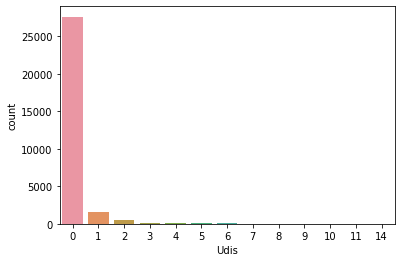

In [80]:
sns.countplot(df.Udis)

In [81]:
df[df.Udis>0].groupby('Gender').mean()['Udis']

Gender
F    1.821716
M    1.495868
Name: Udis, dtype: float64

In [82]:
df.groupby('Order_cat').mean()['Udis']

Order_cat
0 order           0.127776
1 to 6 orders     0.148402
7 to 12 orders    0.148883
Name: Udis, dtype: float64

In [83]:
find_proportion('Udis', df)

Proportion of 0:  91.96 %
Proportion of 1:  5.09 %
Proportion of 2:  1.5699999999999998 %
Proportion of 3:  0.5599999999999999 %
Proportion of 4:  0.32 %
Proportion of 5:  0.21 %
Proportion of 6:  0.13999999999999999 %
Proportion of 7:  0.06 %
Proportion of 8:  0.04 %
Proportion of 9:  0.02 %
Proportion of 11:  0.02 %
Proportion of 10:  0.01 %
Proportion of 14:  0.01 %


In [84]:
zero['Udis'] = 91.96

#### Mondelez International

In [85]:
df['Mondelez International'].value_counts()

0     26917
1      2406
2       472
3       105
4        41
5        38
6        11
8         4
7         2
9         1
10        1
12        1
31        1
Name: Mondelez International, dtype: int64

<AxesSubplot:xlabel='Mondelez International', ylabel='count'>

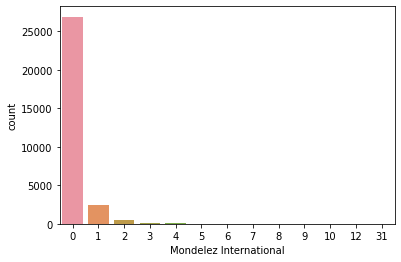

In [86]:
sns.countplot(df['Mondelez International'])

In [87]:
df[df['Mondelez International']>0].groupby('Gender').mean()['Mondelez International']

Gender
F    1.335809
M    1.513158
Name: Mondelez International, dtype: float64

In [88]:
df.groupby('Order_cat').mean()['Mondelez International']

Order_cat
0 order           0.122566
1 to 6 orders     0.147518
7 to 12 orders    0.141981
Name: Mondelez International, dtype: float64

In [89]:
df[df['Mondelez International']==31]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Order_cat
19128,19129,F,5,0,1,1,0,0,31,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1 to 6 orders


In [90]:
# The customer with id 19129 searched Mondelez International 31 times, and she has ordered 5 times before. So there is 
# a high chance that if the product of Mondelez International is discounted, she may buy it.

In [91]:
find_proportion('Mondelez International', df)

Proportion of 0:  89.72 %
Proportion of 1:  8.02 %
Proportion of 2:  1.5699999999999998 %
Proportion of 3:  0.35000000000000003 %
Proportion of 4:  0.13999999999999999 %
Proportion of 5:  0.13 %
Proportion of 6:  0.04 %
Proportion of 8:  0.01 %
Proportion of 7:  0.01 %
Proportion of 9:  0.0 %
Proportion of 10:  0.0 %
Proportion of 12:  0.0 %
Proportion of 31:  0.0 %


In [92]:
zero['Mondelez International'] = 89.72

#### Wrangler

In [93]:
df.Wrangler.value_counts()

0    28164
1     1099
2      408
3      168
4       81
5       40
6       25
7        7
8        6
9        2
Name: Wrangler, dtype: int64

<AxesSubplot:xlabel='Wrangler', ylabel='count'>

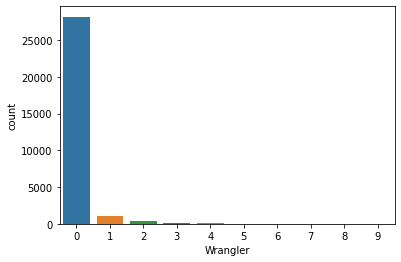

In [94]:
sns.countplot(df.Wrangler)

In [95]:
df[df['Wrangler']>0].groupby('Gender').mean()['Wrangler']

Gender
F    1.753153
M    1.342857
Name: Wrangler, dtype: float64

In [96]:
df.groupby('Order_cat').mean()['Wrangler']

Order_cat
0 order           0.094187
1 to 6 orders     0.113640
7 to 12 orders    0.107143
Name: Wrangler, dtype: float64

In [97]:
find_proportion('Wrangler', df)

Proportion of 0:  93.88 %
Proportion of 1:  3.66 %
Proportion of 2:  1.3599999999999999 %
Proportion of 3:  0.5599999999999999 %
Proportion of 4:  0.27 %
Proportion of 5:  0.13 %
Proportion of 6:  0.08 %
Proportion of 7:  0.02 %
Proportion of 8:  0.02 %
Proportion of 9:  0.01 %


In [98]:
zero['Wrangler'] = 93.88

#### Vans

In [99]:
df.Vans.value_counts()

0     27985
1      1390
2       340
3       108
5        73
4        55
6        24
7        12
9         4
8         3
16        1
10        1
11        1
12        1
13        1
14        1
Name: Vans, dtype: int64

<AxesSubplot:xlabel='Vans', ylabel='count'>

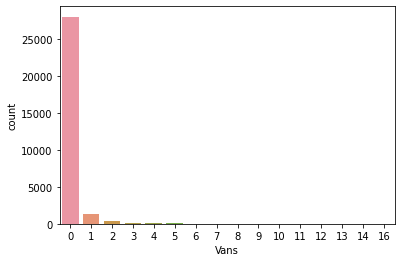

In [100]:
sns.countplot(df.Vans)

In [101]:
df[df['Vans']>0].groupby('Gender').mean()['Vans']

Gender
F    1.363413
M    2.171642
Name: Vans, dtype: float64

In [102]:
df.groupby('Order_cat').mean()['Vans']

Order_cat
0 order           0.098574
1 to 6 orders     0.114818
7 to 12 orders    0.116674
Name: Vans, dtype: float64

In [103]:
find_proportion('Vans', df)

Proportion of 0:  93.28 %
Proportion of 1:  4.63 %
Proportion of 2:  1.13 %
Proportion of 3:  0.36 %
Proportion of 5:  0.24 %
Proportion of 4:  0.18 %
Proportion of 6:  0.08 %
Proportion of 7:  0.04 %
Proportion of 9:  0.01 %
Proportion of 8:  0.01 %
Proportion of 16:  0.0 %
Proportion of 10:  0.0 %
Proportion of 11:  0.0 %
Proportion of 12:  0.0 %
Proportion of 13:  0.0 %
Proportion of 14:  0.0 %


In [104]:
zero['Vans'] = 93.28

#### Fila

In [105]:
df.Fila.value_counts()

0     28410
1      1042
2       246
3       159
4        49
5        38
6        21
7        15
9         5
10        5
8         4
11        3
12        1
13        1
15        1
Name: Fila, dtype: int64

<AxesSubplot:xlabel='Fila', ylabel='count'>

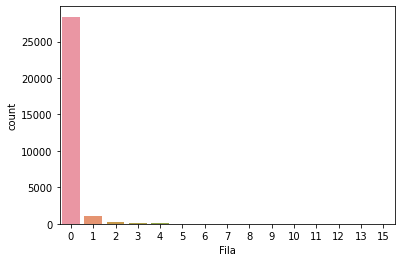

In [106]:
sns.countplot(df.Fila)

In [107]:
df[df['Fila']>0].groupby('Gender').mean()['Fila']

Gender
F    1.697256
M    2.034247
Name: Fila, dtype: float64

In [108]:
df.groupby('Order_cat').mean()['Fila']

Order_cat
0 order           0.101865
1 to 6 orders     0.094049
7 to 12 orders    0.088519
Name: Fila, dtype: float64

In [109]:
find_proportion('Fila', df)

Proportion of 0:  94.69999999999999 %
Proportion of 1:  3.47 %
Proportion of 2:  0.8200000000000001 %
Proportion of 3:  0.53 %
Proportion of 4:  0.16 %
Proportion of 5:  0.13 %
Proportion of 6:  0.06999999999999999 %
Proportion of 7:  0.05 %
Proportion of 9:  0.02 %
Proportion of 10:  0.02 %
Proportion of 8:  0.01 %
Proportion of 11:  0.01 %
Proportion of 12:  0.0 %
Proportion of 13:  0.0 %
Proportion of 15:  0.0 %


In [110]:
zero['Fila'] = 94.69

#### Brooks

In [111]:
df.Brooks.value_counts()

0     26700
1      2700
2       433
3       102
4        35
5        14
6         6
7         5
9         3
12        2
Name: Brooks, dtype: int64

<AxesSubplot:xlabel='Brooks', ylabel='count'>

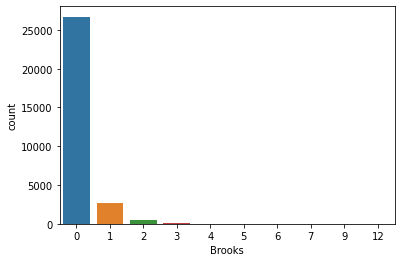

In [112]:
sns.countplot(df.Brooks)

In [113]:
df[df['Brooks']>0].groupby('Gender').mean()['Brooks']

Gender
F    1.270224
M    1.293680
Name: Brooks, dtype: float64

In [114]:
df.groupby('Order_cat').mean()['Brooks']

Order_cat
0 order           0.126542
1 to 6 orders     0.140890
7 to 12 orders    0.149869
Name: Brooks, dtype: float64

In [115]:
find_proportion('Brooks', df)

Proportion of 0:  89.0 %
Proportion of 1:  9.0 %
Proportion of 2:  1.44 %
Proportion of 3:  0.33999999999999997 %
Proportion of 4:  0.12 %
Proportion of 5:  0.05 %
Proportion of 6:  0.02 %
Proportion of 7:  0.02 %
Proportion of 9:  0.01 %
Proportion of 12:  0.01 %


In [116]:
zero['Brooks'] = 89.0

#### H&M

In [117]:
df.Brooks.value_counts()

0     26700
1      2700
2       433
3       102
4        35
5        14
6         6
7         5
9         3
12        2
Name: Brooks, dtype: int64

<AxesSubplot:xlabel='Brooks', ylabel='count'>

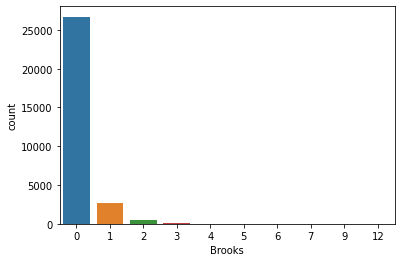

In [118]:
sns.countplot(df.Brooks)

In [119]:
df[df['Brooks']>0].groupby('Gender').mean()['Brooks']

Gender
F    1.270224
M    1.293680
Name: Brooks, dtype: float64

In [120]:
df.groupby('Order_cat').mean()['Brooks']

Order_cat
0 order           0.126542
1 to 6 orders     0.140890
7 to 12 orders    0.149869
Name: Brooks, dtype: float64

In [121]:
find_proportion('Brooks', df)

Proportion of 0:  89.0 %
Proportion of 1:  9.0 %
Proportion of 2:  1.44 %
Proportion of 3:  0.33999999999999997 %
Proportion of 4:  0.12 %
Proportion of 5:  0.05 %
Proportion of 6:  0.02 %
Proportion of 7:  0.02 %
Proportion of 9:  0.01 %
Proportion of 12:  0.01 %


In [122]:
zero['Brooks'] = 89.0

#### Dairy Queen

In [123]:
df.Brooks.value_counts()

0     26700
1      2700
2       433
3       102
4        35
5        14
6         6
7         5
9         3
12        2
Name: Brooks, dtype: int64

<AxesSubplot:xlabel='Brooks', ylabel='count'>

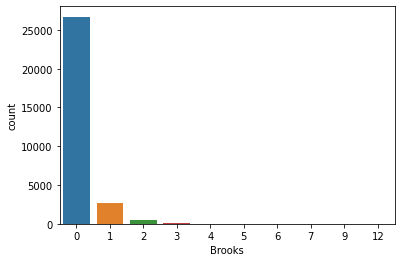

In [124]:
sns.countplot(df.Brooks)

In [125]:
df[df['Brooks']>0].groupby('Gender').mean()['Brooks']

Gender
F    1.270224
M    1.293680
Name: Brooks, dtype: float64

In [126]:
df.groupby('Order_cat').mean()['Brooks']

Order_cat
0 order           0.126542
1 to 6 orders     0.140890
7 to 12 orders    0.149869
Name: Brooks, dtype: float64

In [127]:
find_proportion('Brooks', df)

Proportion of 0:  89.0 %
Proportion of 1:  9.0 %
Proportion of 2:  1.44 %
Proportion of 3:  0.33999999999999997 %
Proportion of 4:  0.12 %
Proportion of 5:  0.05 %
Proportion of 6:  0.02 %
Proportion of 7:  0.02 %
Proportion of 9:  0.01 %
Proportion of 12:  0.01 %


In [128]:
zero['Brooks'] = 89.0

#### Fendi

In [129]:
df.Fendi.value_counts()

0     26931
1      2411
2       420
3       106
4        72
5        24
6        21
7         5
9         3
8         2
12        2
18        1
10        1
11        1
Name: Fendi, dtype: int64

<AxesSubplot:xlabel='Fendi', ylabel='count'>

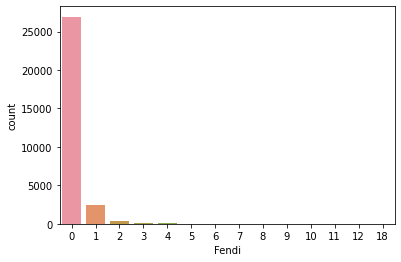

In [130]:
sns.countplot(df.Fendi)

In [131]:
df[df['Fendi']>0].groupby('Gender').mean()['Fendi']

Gender
F    1.39060
M    1.34472
Name: Fendi, dtype: float64

In [132]:
df.groupby('Order_cat').mean()['Fendi']

Order_cat
0 order           0.118316
1 to 6 orders     0.148255
7 to 12 orders    0.149869
Name: Fendi, dtype: float64

In [133]:
find_proportion('Fendi', df)

Proportion of 0:  89.77000000000001 %
Proportion of 1:  8.04 %
Proportion of 2:  1.4000000000000001 %
Proportion of 3:  0.35000000000000003 %
Proportion of 4:  0.24 %
Proportion of 5:  0.08 %
Proportion of 6:  0.06999999999999999 %
Proportion of 7:  0.02 %
Proportion of 9:  0.01 %
Proportion of 8:  0.01 %
Proportion of 12:  0.01 %
Proportion of 18:  0.0 %
Proportion of 10:  0.0 %
Proportion of 11:  0.0 %


In [134]:
zero['Fendi'] = 89.77

#### Hewlett Packard

In [135]:
df['Hewlett Packard'].value_counts()

0     27033
1      2037
2       437
3       214
4       146
5       113
6        14
7         4
9         1
10        1
Name: Hewlett Packard, dtype: int64

<AxesSubplot:xlabel='Hewlett Packard', ylabel='count'>

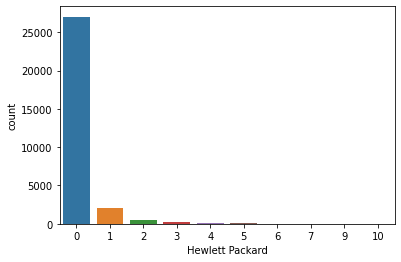

In [136]:
sns.countplot(df['Hewlett Packard'])

In [137]:
df[df['Hewlett Packard']>0].groupby('Gender').mean()['Hewlett Packard']

Gender
F    1.575696
M    1.741818
Name: Hewlett Packard, dtype: float64

In [138]:
df.groupby('Order_cat').mean()['Hewlett Packard']

Order_cat
0 order           0.150946
1 to 6 orders     0.162248
7 to 12 orders    0.167507
Name: Hewlett Packard, dtype: float64

In [139]:
find_proportion('Hewlett Packard', df)

Proportion of 0:  90.11 %
Proportion of 1:  6.79 %
Proportion of 2:  1.46 %
Proportion of 3:  0.7100000000000001 %
Proportion of 4:  0.49 %
Proportion of 5:  0.38 %
Proportion of 6:  0.05 %
Proportion of 7:  0.01 %
Proportion of 9:  0.0 %
Proportion of 10:  0.0 %


In [140]:
zero['Hewlett Packard'] = 90.11

#### Pladis

In [141]:
df.Pladis.value_counts()

0     28051
1      1332
2       303
3       142
4       103
5        43
6        14
7         7
8         3
9         1
26        1
Name: Pladis, dtype: int64

<AxesSubplot:xlabel='Pladis', ylabel='count'>

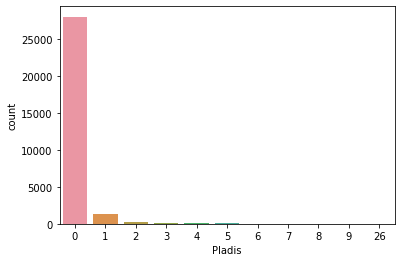

In [142]:
sns.countplot(df.Pladis)

In [143]:
df[df['Pladis']>0].groupby('Gender').mean()['Pladis']

Gender
F    1.632716
M    1.670051
Name: Pladis, dtype: float64

In [144]:
df.groupby('Order_cat').mean()['Pladis']

Order_cat
0 order           0.095695
1 to 6 orders     0.114082
7 to 12 orders    0.102542
Name: Pladis, dtype: float64

In [145]:
find_proportion('Pladis', df)

Proportion of 0:  93.5 %
Proportion of 1:  4.44 %
Proportion of 2:  1.01 %
Proportion of 3:  0.47000000000000003 %
Proportion of 4:  0.33999999999999997 %
Proportion of 5:  0.13999999999999999 %
Proportion of 6:  0.05 %
Proportion of 7:  0.02 %
Proportion of 8:  0.01 %
Proportion of 9:  0.0 %
Proportion of 26:  0.0 %


In [146]:
zero['Pladis'] = 93.5

#### Asics

In [147]:
df.Asics.value_counts()

0     25586
1      2593
2       841
3       408
4       221
5       120
6        75
7        52
8        27
9        24
10       11
11        9
12        8
13        7
14        4
20        3
15        2
18        2
66        1
21        1
16        1
27        1
17        1
19        1
34        1
Name: Asics, dtype: int64

<AxesSubplot:xlabel='Asics', ylabel='count'>

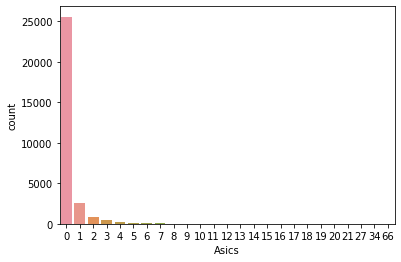

In [148]:
sns.countplot(df.Asics)

In [149]:
df[df['Asics']>0].groupby('Gender').mean()['Asics']

Gender
F    2.024152
M    2.167059
Name: Asics, dtype: float64

In [150]:
df.groupby('Order_cat').mean()['Asics']

Order_cat
0 order           0.247052
1 to 6 orders     0.317793
7 to 12 orders    0.316608
Name: Asics, dtype: float64

In [151]:
df[df['Asics']>=20]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Order_cat
113,114,F,8,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,34,3,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7 to 12 orders
4910,4911,M,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,21,11,5,2,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1 to 6 orders
11195,11196,F,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1 to 6 orders
14992,14993,F,5,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,20,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1 to 6 orders
20592,20593,M,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,20,0,19,5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,7 to 12 orders
25616,25617,F,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,1 to 6 orders
28452,28453,M,10,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,20,7,5,0,1,1,0,0,3,0,0,1,0,2,1,1,1,1,0,0,7 to 12 orders


In [152]:
# These are the customers who searched for Asics more than 20 times.

In [153]:
find_proportion('Asics', df)

Proportion of 0:  85.28999999999999 %
Proportion of 1:  8.64 %
Proportion of 2:  2.8000000000000003 %
Proportion of 3:  1.3599999999999999 %
Proportion of 4:  0.74 %
Proportion of 5:  0.4 %
Proportion of 6:  0.25 %
Proportion of 7:  0.16999999999999998 %
Proportion of 8:  0.09 %
Proportion of 9:  0.08 %
Proportion of 10:  0.04 %
Proportion of 11:  0.03 %
Proportion of 12:  0.03 %
Proportion of 13:  0.02 %
Proportion of 14:  0.01 %
Proportion of 20:  0.01 %
Proportion of 15:  0.01 %
Proportion of 18:  0.01 %
Proportion of 66:  0.0 %
Proportion of 21:  0.0 %
Proportion of 16:  0.0 %
Proportion of 27:  0.0 %
Proportion of 17:  0.0 %
Proportion of 19:  0.0 %
Proportion of 34:  0.0 %


In [154]:
zero['Asics'] = 85.28

#### Siemens

In [155]:
df.Siemens.value_counts()

0     29077
1       621
2       210
3        47
7        18
4        17
5         4
6         3
8         1
9         1
11        1
Name: Siemens, dtype: int64

<AxesSubplot:xlabel='Siemens', ylabel='count'>

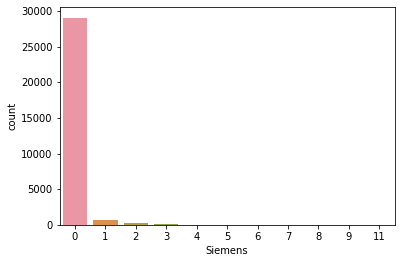

In [156]:
sns.countplot(df.Siemens)

In [157]:
df[df['Siemens']>0].groupby('Gender').mean()['Siemens']

Gender
F    1.487952
M    1.591398
Name: Siemens, dtype: float64

In [158]:
df.groupby('Order_cat').mean()['Siemens']

Order_cat
0 order           0.047710
1 to 6 orders     0.044705
7 to 12 orders    0.053352
Name: Siemens, dtype: float64

In [159]:
find_proportion('Siemens', df)

Proportion of 0:  96.92 %
Proportion of 1:  2.07 %
Proportion of 2:  0.7000000000000001 %
Proportion of 3:  0.16 %
Proportion of 7:  0.06 %
Proportion of 4:  0.06 %
Proportion of 5:  0.01 %
Proportion of 6:  0.01 %
Proportion of 8:  0.0 %
Proportion of 9:  0.0 %
Proportion of 11:  0.0 %


In [160]:
zero['Siemens'] = 96.92

#### J.M. Smucker

In [161]:
df['J.M. Smucker'].value_counts()

0     16480
1      8467
2      3062
3      1069
4       498
5       200
6       117
7        33
8        25
10       11
9         8
13        6
12        3
18        3
11        2
20        2
17        2
14        2
15        2
22        1
16        1
23        1
19        1
21        1
25        1
64        1
27        1
Name: J.M. Smucker, dtype: int64

<AxesSubplot:xlabel='J.M. Smucker', ylabel='count'>

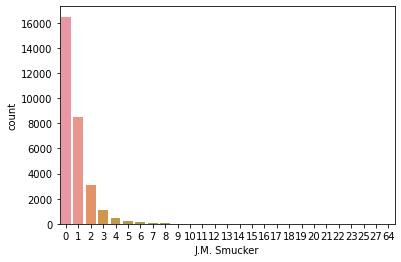

In [162]:
sns.countplot(df['J.M. Smucker'])

In [163]:
df[df['J.M. Smucker']>0].groupby('Gender').mean()['J.M. Smucker']

Gender
F    1.656214
M    1.719557
Name: J.M. Smucker, dtype: float64

In [164]:
df.groupby('Order_cat').mean()['J.M. Smucker']

Order_cat
0 order           0.682067
1 to 6 orders     0.767639
7 to 12 orders    0.793821
Name: J.M. Smucker, dtype: float64

In [165]:
df[df['J.M. Smucker']==64]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Order_cat
13224,13225,NaN,6,0,0,0,0,0,1,0,0,1,0,2,0,0,0,0,0,0,64,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1 to 6 orders


In [166]:
# Customer 13225 has a high chance of buying the products of J.M. Smucker if marketed properly.

In [167]:
find_proportion('J.M. Smucker', df)

Proportion of 0:  54.93 %
Proportion of 1:  28.22 %
Proportion of 2:  10.209999999999999 %
Proportion of 3:  3.56 %
Proportion of 4:  1.66 %
Proportion of 5:  0.67 %
Proportion of 6:  0.38999999999999996 %
Proportion of 7:  0.11 %
Proportion of 8:  0.08 %
Proportion of 10:  0.04 %
Proportion of 9:  0.03 %
Proportion of 13:  0.02 %
Proportion of 12:  0.01 %
Proportion of 18:  0.01 %
Proportion of 11:  0.01 %
Proportion of 20:  0.01 %
Proportion of 17:  0.01 %
Proportion of 14:  0.01 %
Proportion of 15:  0.01 %
Proportion of 22:  0.0 %
Proportion of 16:  0.0 %
Proportion of 23:  0.0 %
Proportion of 19:  0.0 %
Proportion of 21:  0.0 %
Proportion of 25:  0.0 %
Proportion of 64:  0.0 %
Proportion of 27:  0.0 %


In [168]:
# Atleast 46% of the customers has searched for J.M. Smucker atleast once.

In [169]:
zero['J.M. Smucker'] = 54.93

#### Pop Chips

In [170]:
df['Pop Chips'].value_counts()

0     24960
1      3705
2       855
3       242
4       108
5        51
6        35
7        19
9         7
8         5
10        5
11        2
12        2
21        1
18        1
13        1
15        1
Name: Pop Chips, dtype: int64

<AxesSubplot:xlabel='Pop Chips', ylabel='count'>

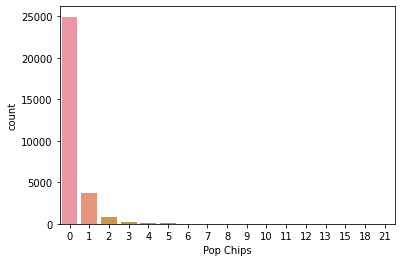

In [171]:
sns.countplot(df['Pop Chips'])

In [172]:
df[df['Pop Chips']>0].groupby('Gender').mean()['Pop Chips']

Gender
F    1.475629
M    1.511811
Name: Pop Chips, dtype: float64

In [173]:
df.groupby('Order_cat').mean()['Pop Chips']

Order_cat
0 order           0.216891
1 to 6 orders     0.254014
7 to 12 orders    0.263585
Name: Pop Chips, dtype: float64

In [174]:
find_proportion('Pop Chips', df)

Proportion of 0:  83.2 %
Proportion of 1:  12.35 %
Proportion of 2:  2.85 %
Proportion of 3:  0.8099999999999999 %
Proportion of 4:  0.36 %
Proportion of 5:  0.16999999999999998 %
Proportion of 6:  0.12 %
Proportion of 7:  0.06 %
Proportion of 9:  0.02 %
Proportion of 8:  0.02 %
Proportion of 10:  0.02 %
Proportion of 11:  0.01 %
Proportion of 12:  0.01 %
Proportion of 21:  0.0 %
Proportion of 18:  0.0 %
Proportion of 13:  0.0 %
Proportion of 15:  0.0 %


In [175]:
zero['Pop Chips'] = 83.2

#### Juniper

In [176]:
df.Juniper.value_counts()

0     22031
1      5203
2      1585
3       563
4       244
5       124
6        71
7        54
8        25
9        22
10       16
11       14
14       11
12        6
18        6
15        5
13        3
27        2
22        2
23        2
20        2
17        2
39        1
26        1
16        1
37        1
52        1
36        1
79        1
Name: Juniper, dtype: int64

<AxesSubplot:xlabel='Juniper', ylabel='count'>

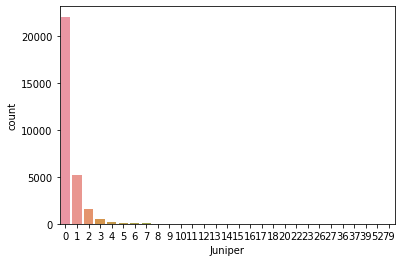

In [177]:
sns.countplot(df.Juniper)

In [178]:
df[df['Juniper']>0].groupby('Gender').mean()['Juniper']

Gender
F    1.739068
M    1.943054
Name: Juniper, dtype: float64

In [179]:
df.groupby('Order_cat').mean()['Juniper']

Order_cat
0 order           0.474225
1 to 6 orders     0.478495
7 to 12 orders    0.456727
Name: Juniper, dtype: float64

In [180]:
df[df.Orders!=0][df.Juniper>23]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Order_cat
8140,8141,F,6,0,0,0,0,0,0,0,0,0,0,1,1,3,4,0,0,0,0,0,37,0,6,0,1,0,0,0,0,0,2,2,0,0,0,0,1 to 6 orders
11816,11817,M,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,26,2,10,5,1,0,0,0,0,0,0,0,1,3,0,0,1 to 6 orders
12457,12458,M,10,0,1,0,0,0,2,0,1,0,3,0,0,0,0,0,0,0,2,0,27,1,13,4,0,0,0,0,0,0,0,0,1,2,0,0,7 to 12 orders
14283,14284,M,4,0,1,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,1,1,39,1,9,1,0,0,0,0,0,0,0,0,2,0,0,0,1 to 6 orders
24337,24338,M,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,1,30,11,0,0,0,0,0,1,0,0,0,1,0,0,7 to 12 orders


In [181]:
# The customers shown above are those who ordered atleast once and searched for Juniper more than 23 times

In [182]:
find_proportion('Juniper', df)

Proportion of 0:  73.44000000000001 %
Proportion of 1:  17.34 %
Proportion of 2:  5.28 %
Proportion of 3:  1.8800000000000001 %
Proportion of 4:  0.8099999999999999 %
Proportion of 5:  0.41000000000000003 %
Proportion of 6:  0.24 %
Proportion of 7:  0.18 %
Proportion of 8:  0.08 %
Proportion of 9:  0.06999999999999999 %
Proportion of 10:  0.05 %
Proportion of 11:  0.05 %
Proportion of 14:  0.04 %
Proportion of 12:  0.02 %
Proportion of 18:  0.02 %
Proportion of 15:  0.02 %
Proportion of 13:  0.01 %
Proportion of 27:  0.01 %
Proportion of 22:  0.01 %
Proportion of 23:  0.01 %
Proportion of 20:  0.01 %
Proportion of 17:  0.01 %
Proportion of 39:  0.0 %
Proportion of 26:  0.0 %
Proportion of 16:  0.0 %
Proportion of 37:  0.0 %
Proportion of 52:  0.0 %
Proportion of 36:  0.0 %
Proportion of 79:  0.0 %


In [183]:
zero['Juniper'] = 73.44

#### Huawei

In [184]:
df.Huawei.value_counts()

0     25666
1      2585
2       984
3       379
4       189
5        92
6        37
7        26
8        15
9        13
10        6
11        4
16        1
17        1
12        1
44        1
Name: Huawei, dtype: int64

<AxesSubplot:xlabel='Huawei', ylabel='count'>

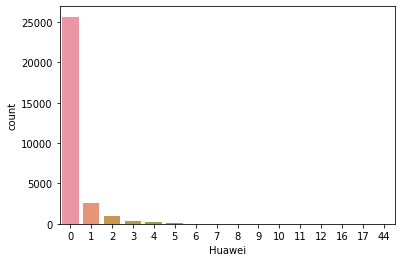

In [185]:
sns.countplot(df.Huawei)

In [186]:
df[df['Huawei']>0].groupby('Gender').mean()['Huawei']

Gender
F    1.804662
M    1.704762
Name: Huawei, dtype: float64

In [187]:
df.groupby('Order_cat').mean()['Huawei']

Order_cat
0 order           0.238964
1 to 6 orders     0.266976
7 to 12 orders    0.259860
Name: Huawei, dtype: float64

In [188]:
find_proportion('Huawei', df)

Proportion of 0:  85.55 %
Proportion of 1:  8.62 %
Proportion of 2:  3.2800000000000002 %
Proportion of 3:  1.26 %
Proportion of 4:  0.63 %
Proportion of 5:  0.31 %
Proportion of 6:  0.12 %
Proportion of 7:  0.09 %
Proportion of 8:  0.05 %
Proportion of 9:  0.04 %
Proportion of 10:  0.02 %
Proportion of 11:  0.01 %
Proportion of 16:  0.0 %
Proportion of 17:  0.0 %
Proportion of 12:  0.0 %
Proportion of 44:  0.0 %


In [189]:
zero['Huawei'] = 85.55

#### Compaq

In [190]:
df.Compaq.value_counts()

0     27653
1      1770
2       332
3       112
4        75
6        17
5        16
9         4
11        4
7         3
8         3
10        3
16        2
14        1
30        1
23        1
29        1
13        1
15        1
Name: Compaq, dtype: int64

<AxesSubplot:xlabel='Compaq', ylabel='count'>

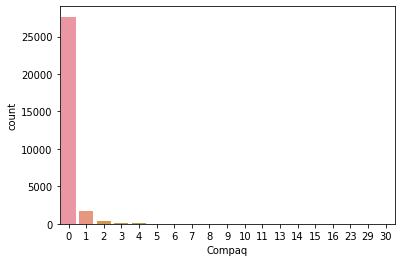

In [191]:
sns.countplot(df.Compaq)

In [192]:
df[df['Compaq']>0].groupby('Gender').mean()['Compaq']

Gender
F    1.453917
M    1.786241
Name: Compaq, dtype: float64

In [193]:
df.groupby('Order_cat').mean()['Compaq']

Order_cat
0 order           0.125034
1 to 6 orders     0.112240
7 to 12 orders    0.123466
Name: Compaq, dtype: float64

In [194]:
find_proportion('Compaq', df)

Proportion of 0:  92.17999999999999 %
Proportion of 1:  5.8999999999999995 %
Proportion of 2:  1.11 %
Proportion of 3:  0.37 %
Proportion of 4:  0.25 %
Proportion of 6:  0.06 %
Proportion of 5:  0.05 %
Proportion of 9:  0.01 %
Proportion of 11:  0.01 %
Proportion of 7:  0.01 %
Proportion of 8:  0.01 %
Proportion of 10:  0.01 %
Proportion of 16:  0.01 %
Proportion of 14:  0.0 %
Proportion of 30:  0.0 %
Proportion of 23:  0.0 %
Proportion of 29:  0.0 %
Proportion of 13:  0.0 %
Proportion of 15:  0.0 %


In [195]:
zero['Compaq'] = 92.17

#### IBM

In [196]:
df.IBM.value_counts()

0     29384
1       424
3       100
2        77
4         7
5         4
8         2
6         1
11        1
Name: IBM, dtype: int64

<AxesSubplot:xlabel='IBM', ylabel='count'>

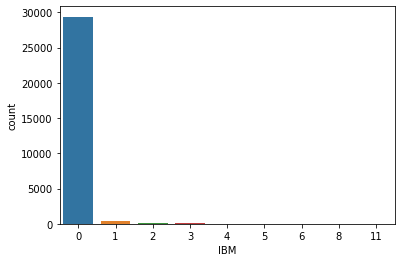

In [197]:
sns.countplot(df.IBM)

In [198]:
df[df['IBM']>0].groupby('Gender').mean()['IBM']

Gender
F    1.429885
M    1.916667
Name: IBM, dtype: float64

In [199]:
df.groupby('Order_cat').mean()['IBM']

Order_cat
0 order           0.036057
1 to 6 orders     0.032258
7 to 12 orders    0.028265
Name: IBM, dtype: float64

In [200]:
find_proportion('IBM', df)

Proportion of 0:  97.95 %
Proportion of 1:  1.41 %
Proportion of 3:  0.33 %
Proportion of 2:  0.26 %
Proportion of 4:  0.02 %
Proportion of 5:  0.01 %
Proportion of 8:  0.01 %
Proportion of 6:  0.0 %
Proportion of 11:  0.0 %


In [201]:
zero['IBM'] = 97.95

#### Burberry

In [202]:
df.Burberry.value_counts()

0     23120
1      4079
2      1437
3       618
4       330
5       191
6        92
7        48
8        36
9        19
11       10
10        9
13        3
23        1
16        1
21        1
19        1
18        1
27        1
12        1
37        1
Name: Burberry, dtype: int64

<AxesSubplot:xlabel='Burberry', ylabel='count'>

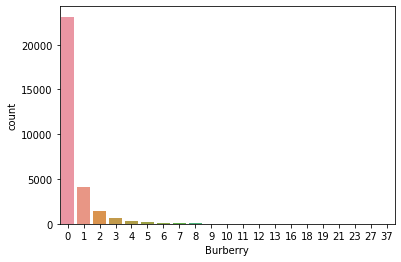

In [203]:
sns.countplot(df.Burberry)

In [204]:
df[df['Burberry']>0].groupby('Gender').mean()['Burberry']

Gender
F    1.902713
M    1.681034
Name: Burberry, dtype: float64

In [205]:
df.groupby('Order_cat').mean()['Burberry']

Order_cat
0 order           0.378119
1 to 6 orders     0.449993
7 to 12 orders    0.435254
Name: Burberry, dtype: float64

In [206]:
find_proportion('Burberry', df)

Proportion of 0:  77.07000000000001 %
Proportion of 1:  13.600000000000001 %
Proportion of 2:  4.79 %
Proportion of 3:  2.06 %
Proportion of 4:  1.0999999999999999 %
Proportion of 5:  0.64 %
Proportion of 6:  0.31 %
Proportion of 7:  0.16 %
Proportion of 8:  0.12 %
Proportion of 9:  0.06 %
Proportion of 11:  0.03 %
Proportion of 10:  0.03 %
Proportion of 13:  0.01 %
Proportion of 23:  0.0 %
Proportion of 16:  0.0 %
Proportion of 21:  0.0 %
Proportion of 19:  0.0 %
Proportion of 18:  0.0 %
Proportion of 27:  0.0 %
Proportion of 12:  0.0 %
Proportion of 37:  0.0 %


In [207]:
zero['Burberry'] = 77.07

#### Mi

In [208]:
df.Mi.value_counts()

0    27540
1     1721
2      437
3      215
4       55
5       19
6        8
7        4
9        1
Name: Mi, dtype: int64

<AxesSubplot:xlabel='Mi', ylabel='count'>

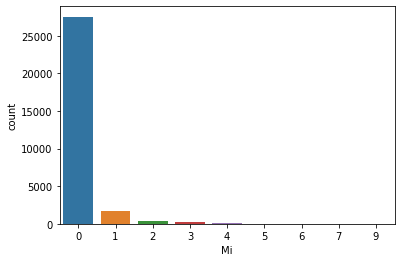

In [209]:
sns.countplot(df.Mi)

In [210]:
df[df['Mi']>0].groupby('Gender').mean()['Mi']

Gender
F    1.467391
M    1.447853
Name: Mi, dtype: float64

In [211]:
df.groupby('Order_cat').mean()['Mi']

Order_cat
0 order           0.109816
1 to 6 orders     0.124098
7 to 12 orders    0.126424
Name: Mi, dtype: float64

In [212]:
find_proportion('Mi', df)

Proportion of 0:  91.8 %
Proportion of 1:  5.74 %
Proportion of 2:  1.46 %
Proportion of 3:  0.72 %
Proportion of 4:  0.18 %
Proportion of 5:  0.06 %
Proportion of 6:  0.03 %
Proportion of 7:  0.01 %
Proportion of 9:  0.0 %


In [213]:
zero['Mi'] = 91.8

#### LG

In [214]:
df.LG.value_counts()

0     28062
1      1250
2       473
4        99
3        76
5        25
6         6
7         3
8         2
16        1
19        1
10        1
13        1
Name: LG, dtype: int64

<AxesSubplot:xlabel='LG', ylabel='count'>

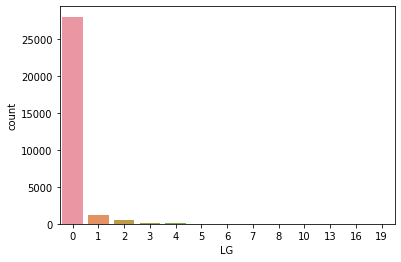

In [215]:
sns.countplot(df.LG)

In [216]:
df[df['LG']>0].groupby('Gender').mean()['LG']

Gender
F    1.573186
M    1.773723
Name: LG, dtype: float64

In [217]:
df.groupby('Order_cat').mean()['LG']

Order_cat
0 order           0.106937
1 to 6 orders     0.101046
7 to 12 orders    0.101227
Name: LG, dtype: float64

In [218]:
find_proportion('LG', df)

Proportion of 0:  93.54 %
Proportion of 1:  4.17 %
Proportion of 2:  1.58 %
Proportion of 4:  0.33 %
Proportion of 3:  0.25 %
Proportion of 5:  0.08 %
Proportion of 6:  0.02 %
Proportion of 7:  0.01 %
Proportion of 8:  0.01 %
Proportion of 16:  0.0 %
Proportion of 19:  0.0 %
Proportion of 10:  0.0 %
Proportion of 13:  0.0 %


In [219]:
zero['LG'] = 93.54

#### Dior

In [220]:
df.Dior.value_counts()

0     24591
1      3742
2      1056
3       387
4       118
5        51
6        25
7        16
9         7
8         4
12        2
11        1
Name: Dior, dtype: int64

<AxesSubplot:xlabel='Dior', ylabel='count'>

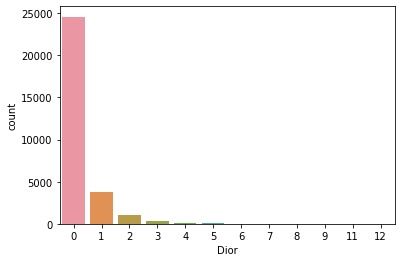

In [221]:
sns.countplot(df.Dior)

In [222]:
df[df['Dior']>0].groupby('Gender').mean()['Dior']

Gender
F    1.498644
M    1.483577
Name: Dior, dtype: float64

In [223]:
df.groupby('Order_cat').mean()['Dior']

Order_cat
0 order           0.241568
1 to 6 orders     0.283326
7 to 12 orders    0.276621
Name: Dior, dtype: float64

In [224]:
find_proportion('Dior', df)

Proportion of 0:  81.97 %
Proportion of 1:  12.47 %
Proportion of 2:  3.52 %
Proportion of 3:  1.29 %
Proportion of 4:  0.38999999999999996 %
Proportion of 5:  0.16999999999999998 %
Proportion of 6:  0.08 %
Proportion of 7:  0.05 %
Proportion of 9:  0.02 %
Proportion of 8:  0.01 %
Proportion of 12:  0.01 %
Proportion of 11:  0.0 %


In [225]:
zero['Dior'] = 81.97

#### Scabal

In [226]:
df.Scabal.value_counts()

0     22215
1      5651
2      1384
3       430
4       254
5        41
6        13
7         6
8         4
9         1
11        1
Name: Scabal, dtype: int64

<AxesSubplot:xlabel='Scabal', ylabel='count'>

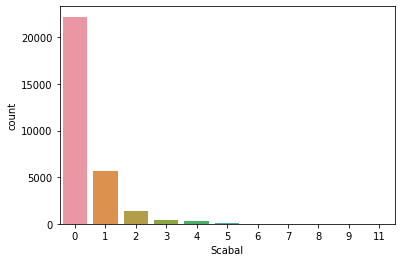

In [227]:
sns.countplot(df.Scabal)

In [228]:
df[df['Scabal']>0].groupby('Gender').mean()['Scabal']

Gender
F    1.417872
M    1.474510
Name: Scabal, dtype: float64

In [229]:
df.groupby('Order_cat').mean()['Scabal']

Order_cat
0 order           0.336030
1 to 6 orders     0.376639
7 to 12 orders    0.387489
Name: Scabal, dtype: float64

In [230]:
find_proportion('Scabal', df)

Proportion of 0:  74.05000000000001 %
Proportion of 1:  18.84 %
Proportion of 2:  4.61 %
Proportion of 3:  1.43 %
Proportion of 4:  0.8500000000000001 %
Proportion of 5:  0.13999999999999999 %
Proportion of 6:  0.04 %
Proportion of 7:  0.02 %
Proportion of 8:  0.01 %
Proportion of 9:  0.0 %
Proportion of 11:  0.0 %


In [231]:
zero['Scabal'] = 74.05

#### Tommy Hilfiger

In [232]:
df['Tommy Hilfiger'].value_counts()

0    26480
1     2704
2      550
3      133
4      113
5       11
6        6
8        2
7        1
Name: Tommy Hilfiger, dtype: int64

<AxesSubplot:xlabel='Tommy Hilfiger', ylabel='count'>

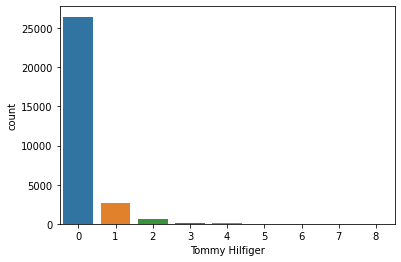

In [233]:
sns.countplot(df['Tommy Hilfiger'])

In [234]:
df[df['Tommy Hilfiger']>0].groupby('Gender').mean()['Tommy Hilfiger']

Gender
F    1.340622
M    1.383178
Name: Tommy Hilfiger, dtype: float64

In [235]:
df.groupby('Order_cat').mean()['Tommy Hilfiger']

Order_cat
0 order           0.155333
1 to 6 orders     0.159007
7 to 12 orders    0.161810
Name: Tommy Hilfiger, dtype: float64

In [236]:
find_proportion('Tommy Hilfiger', df)

Proportion of 0:  88.27000000000001 %
Proportion of 1:  9.01 %
Proportion of 2:  1.83 %
Proportion of 3:  0.44 %
Proportion of 4:  0.38 %
Proportion of 5:  0.04 %
Proportion of 6:  0.02 %
Proportion of 8:  0.01 %
Proportion of 7:  0.0 %


In [237]:
zero['Tommy Hilfiger'] = 88.27

#### Hollister

In [238]:
df.Hollister.value_counts()

0    28324
1     1278
2      271
3       60
5       39
4       21
7        4
6        1
8        1
9        1
Name: Hollister, dtype: int64

<AxesSubplot:xlabel='Hollister', ylabel='count'>

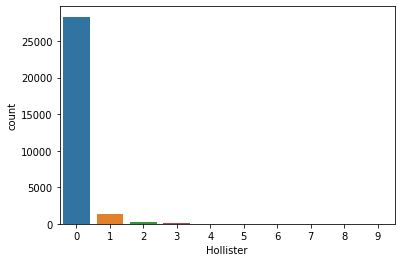

In [239]:
sns.countplot(df.Hollister)

In [240]:
df[df['Hollister']>0].groupby('Gender').mean()['Hollister']

Gender
F    1.385798
M    1.431250
Name: Hollister, dtype: float64

In [241]:
df.groupby('Order_cat').mean()['Hollister']

Order_cat
0 order           0.066630
1 to 6 orders     0.084622
7 to 12 orders    0.076139
Name: Hollister, dtype: float64

In [242]:
find_proportion('Hollister', df)

Proportion of 0:  94.41000000000001 %
Proportion of 1:  4.26 %
Proportion of 2:  0.8999999999999999 %
Proportion of 3:  0.2 %
Proportion of 5:  0.13 %
Proportion of 4:  0.06999999999999999 %
Proportion of 7:  0.01 %
Proportion of 6:  0.0 %
Proportion of 8:  0.0 %
Proportion of 9:  0.0 %


In [243]:
zero['Hollister'] = 94.41

#### Forever 21

In [244]:
df['Forever 21'].value_counts()

0    28647
1     1098
2      175
3       64
4        8
5        4
7        2
6        1
8        1
Name: Forever 21, dtype: int64

<AxesSubplot:xlabel='Forever 21', ylabel='count'>

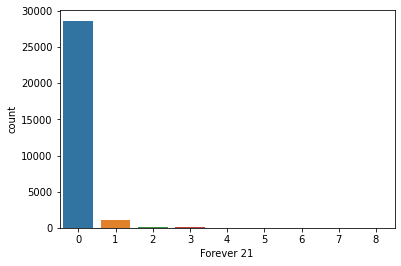

In [245]:
sns.countplot(df['Forever 21'])

In [246]:
df[df['Forever 21']>0].groupby('Gender').mean()['Forever 21']

Gender
F    1.274597
M    1.169492
Name: Forever 21, dtype: float64

In [247]:
df.groupby('Order_cat').mean()['Forever 21']

Order_cat
0 order           0.052783
1 to 6 orders     0.060981
7 to 12 orders    0.055543
Name: Forever 21, dtype: float64

In [248]:
find_proportion('Forever 21', df)

Proportion of 0:  95.49 %
Proportion of 1:  3.66 %
Proportion of 2:  0.58 %
Proportion of 3:  0.21 %
Proportion of 4:  0.03 %
Proportion of 5:  0.01 %
Proportion of 7:  0.01 %
Proportion of 6:  0.0 %
Proportion of 8:  0.0 %


In [249]:
zero['Forever 21'] = 95.49

#### Colavita

In [250]:
df.Colavita.value_counts()

0     25993
1      3015
2       598
3       259
4        63
5        28
6        13
7        10
8         5
10        5
9         3
11        3
22        2
14        2
16        1
Name: Colavita, dtype: int64

<AxesSubplot:xlabel='Colavita', ylabel='count'>

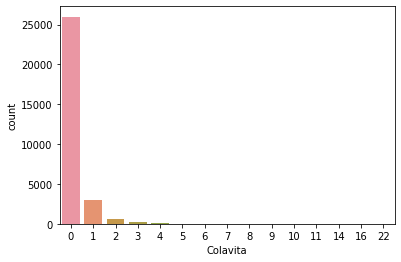

In [251]:
sns.countplot(df.Colavita)

In [252]:
df[df['Colavita']>0].groupby('Gender').mean()['Colavita']

Gender
F    1.395174
M    1.581761
Name: Colavita, dtype: float64

In [253]:
df.groupby('Order_cat').mean()['Colavita']

Order_cat
0 order           0.182342
1 to 6 orders     0.194800
7 to 12 orders    0.196209
Name: Colavita, dtype: float64

In [254]:
find_proportion('Colavita', df)

Proportion of 0:  86.64 %
Proportion of 1:  10.05 %
Proportion of 2:  1.9900000000000002 %
Proportion of 3:  0.86 %
Proportion of 4:  0.21 %
Proportion of 5:  0.09 %
Proportion of 6:  0.04 %
Proportion of 7:  0.03 %
Proportion of 8:  0.02 %
Proportion of 10:  0.02 %
Proportion of 9:  0.01 %
Proportion of 11:  0.01 %
Proportion of 22:  0.01 %
Proportion of 14:  0.01 %
Proportion of 16:  0.0 %


In [255]:
zero['Colavita'] = 86.64

#### Microsoft

In [256]:
df.Microsoft.value_counts()

0     27299
1      2205
2       346
3        81
4        43
5        11
6         4
7         4
9         3
8         1
11        1
12        1
14        1
Name: Microsoft, dtype: int64

<AxesSubplot:xlabel='Microsoft', ylabel='count'>

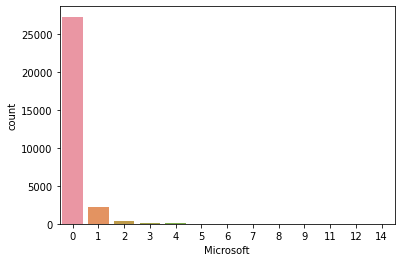

In [257]:
sns.countplot(df.Microsoft)

In [258]:
df[df['Microsoft']>0].groupby('Gender').mean()['Microsoft']

Gender
F    1.289958
M    1.356968
Name: Microsoft, dtype: float64

In [259]:
df.groupby('Order_cat').mean()['Microsoft']

Order_cat
0 order           0.099808
1 to 6 orders     0.122919
7 to 12 orders    0.119851
Name: Microsoft, dtype: float64

In [260]:
find_proportion('Microsoft', df)

Proportion of 0:  91.0 %
Proportion of 1:  7.35 %
Proportion of 2:  1.15 %
Proportion of 3:  0.27 %
Proportion of 4:  0.13999999999999999 %
Proportion of 5:  0.04 %
Proportion of 6:  0.01 %
Proportion of 7:  0.01 %
Proportion of 9:  0.01 %
Proportion of 8:  0.0 %
Proportion of 11:  0.0 %
Proportion of 12:  0.0 %
Proportion of 14:  0.0 %


In [261]:
zero['Microsoft'] = 91.0

#### Jiffy mix

In [262]:
df['Jiffy mix'].value_counts()

0    28079
1     1447
2      340
3       77
4       34
5        7
6        6
8        6
7        4
Name: Jiffy mix, dtype: int64

<AxesSubplot:xlabel='Jiffy mix', ylabel='count'>

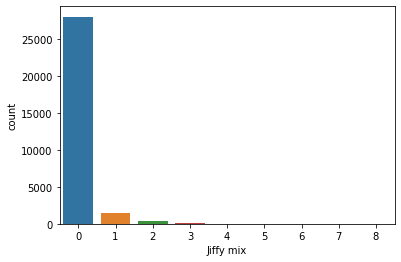

In [263]:
sns.countplot(df['Jiffy mix'])

In [264]:
df[df['Jiffy mix']>0].groupby('Gender').mean()['Jiffy mix']

Gender
F    1.377071
M    1.369338
Name: Jiffy mix, dtype: float64

In [265]:
df.groupby('Order_cat').mean()['Jiffy mix']

Order_cat
0 order           0.074445
1 to 6 orders     0.092944
7 to 12 orders    0.091586
Name: Jiffy mix, dtype: float64

In [266]:
find_proportion('Jiffy mix', df)

Proportion of 0:  93.60000000000001 %
Proportion of 1:  4.82 %
Proportion of 2:  1.13 %
Proportion of 3:  0.26 %
Proportion of 4:  0.11 %
Proportion of 5:  0.02 %
Proportion of 6:  0.02 %
Proportion of 8:  0.02 %
Proportion of 7:  0.01 %


In [267]:
zero['Jiffy mix'] = 93.6

#### Kraft

In [268]:
df.Kraft.value_counts()

0     28597
1       970
2       234
3       152
4        34
5         4
6         3
7         2
16        1
8         1
10        1
11        1
Name: Kraft, dtype: int64

<AxesSubplot:xlabel='Kraft', ylabel='count'>

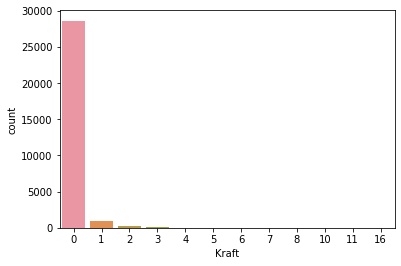

In [269]:
sns.countplot(df.Kraft)

In [270]:
df[df['Kraft']>0].groupby('Gender').mean()['Kraft']

Gender
F    1.454380
M    1.724138
Name: Kraft, dtype: float64

In [271]:
df.groupby('Order_cat').mean()['Kraft']

Order_cat
0 order           0.076364
1 to 6 orders     0.070850
7 to 12 orders    0.066608
Name: Kraft, dtype: float64

In [272]:
find_proportion('Kraft', df)

Proportion of 0:  95.32000000000001 %
Proportion of 1:  3.2300000000000004 %
Proportion of 2:  0.7799999999999999 %
Proportion of 3:  0.51 %
Proportion of 4:  0.11 %
Proportion of 5:  0.01 %
Proportion of 6:  0.01 %
Proportion of 7:  0.01 %
Proportion of 16:  0.0 %
Proportion of 8:  0.0 %
Proportion of 10:  0.0 %
Proportion of 11:  0.0 %


In [273]:
zero['Kraft'] = 95.32

In [274]:
zero_df = pd.DataFrame(zero.values(), index=zero.keys())

In [275]:
# Percentage of customers who never searched for each products

zero_df

,0
Jordan,83.96
Gatorade,83.50
Samsung,89.67
Asus,91.99
Udis,91.96
Mondelez International,89.72
Wrangler,93.88
Vans,93.28
Fila,94.69
Brooks,89.00


In [276]:
zero_df.iloc[zero_df[0].argmax()]

0    97.95
Name: IBM, dtype: float64

In [277]:
# 97.95 % of customers did 0 searches for the product IBM

# Preprocessing

In [278]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Order_cat
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7 to 12 orders
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0 order
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7 to 12 orders
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 order
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,7 to 12 orders


In [279]:
# K-means clustering cannot process string values, so we should remove 'Gender' and 'Order_cat',
# 'Cust_ID' is an unique number and is not useful for analysis.

df_new = df.drop(['Gender', 'Cust_ID', 'Order_cat'], axis=1)

In [280]:
df_new.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [281]:
df_new.shape

(30000, 36)

In [282]:
df_new.corr()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Orders,1.000000,0.016090,0.034310,0.017885,0.015584,0.009018,0.008741,0.003856,0.006343,-0.009627,0.015389,0.030833,-0.002705,0.017077,0.006867,-0.000602,0.022064,0.007843,0.030807,0.018774,-0.002741,0.008031,0.002765,-0.007647,0.015813,0.010369,-0.006382,0.009027,0.020050,0.003550,0.001680,-0.003436,0.007455,0.015307,0.011268,-0.007160
Jordan,0.016090,1.000000,0.177254,0.071258,0.123731,0.135673,0.021950,0.040710,0.115796,0.031611,0.165471,0.038302,0.043857,0.030369,0.008800,0.062050,0.009816,-0.011082,0.054025,0.081462,0.025708,0.051468,0.007495,0.001963,0.096492,0.022963,0.070205,0.061185,0.062582,0.063739,0.026350,0.024710,0.015564,0.015804,0.021651,0.018918
Gatorade,0.034310,0.177254,1.000000,0.063890,0.046215,0.058180,0.031272,0.088166,0.170620,0.026350,0.154345,0.066794,0.055532,0.029120,0.016680,0.062749,0.042912,0.006296,0.060775,0.087545,0.030956,0.042281,0.008773,-0.009290,0.102216,0.033103,0.066443,0.056571,0.045958,0.058190,0.050302,0.031495,0.018279,0.016625,0.038655,0.018553
Samsung,0.017885,0.071258,0.063890,1.000000,0.012274,0.028785,0.035807,0.014565,0.029155,0.024847,0.089334,0.031444,0.014086,0.015095,0.011988,0.025422,0.004546,-0.011741,0.026365,0.048772,0.001621,0.024820,0.004358,-0.005467,0.047852,0.004060,0.058584,0.017369,0.046561,0.015502,0.021566,0.016170,0.005584,0.003640,0.009303,0.006633
Asus,0.015584,0.123731,0.046215,0.012274,1.000000,0.114588,0.018120,0.026668,0.046990,-0.004766,0.114384,0.025349,0.028589,0.006580,0.006500,0.030216,0.010339,-0.000218,0.023046,0.022716,0.017840,0.033468,0.005892,-0.007446,0.047276,0.016904,0.025722,0.028911,0.043168,0.039139,0.017283,0.014186,0.009605,0.019748,0.008001,0.007530
Udis,0.009018,0.135673,0.058180,0.028785,0.114588,1.000000,0.040251,0.023128,0.020696,0.021717,0.089850,0.037187,0.013806,0.011772,0.014293,0.022155,-0.008444,-0.014267,0.013708,0.020427,0.014118,0.024393,0.002922,-0.003076,0.040914,0.013516,0.030406,0.029567,0.068091,0.023367,0.032484,0.035360,0.000437,0.012679,0.004808,0.006795
Mondelez International,0.008741,0.021950,0.031272,0.035807,0.018120,0.040251,1.000000,0.021211,0.020795,0.026681,0.039200,0.043001,0.022947,0.001657,0.012106,0.053772,0.018303,-0.002722,0.059322,0.031040,0.019580,0.021313,0.002441,0.000471,0.065318,0.011150,0.036895,0.034783,0.100657,0.056306,0.036270,0.044912,0.014344,0.013070,0.025066,0.019727
Wrangler,0.003856,0.040710,0.088166,0.014565,0.026668,0.023128,0.021211,1.000000,0.028595,-0.002237,0.021861,0.070330,0.030978,0.024073,0.034098,0.040609,-0.002145,-0.010719,0.020302,0.043520,0.015098,0.030264,-0.000865,-0.006730,0.074666,0.024924,0.079583,0.054262,0.099995,0.045565,0.075141,0.066978,0.006188,0.008203,0.015954,0.014749
Vans,0.006343,0.115796,0.170620,0.029155,0.046990,0.020696,0.020795,0.028595,1.000000,0.002731,0.122174,0.024992,0.031384,0.012768,0.002760,0.032070,-0.000852,-0.008563,0.030542,0.085626,0.010213,0.028003,0.015774,-0.003649,0.058406,-0.009476,0.073194,0.014776,-0.011961,0.021992,0.007039,0.002500,0.000045,-0.002454,0.008639,0.013326
Fila,-0.009627,0.031611,0.026350,0.024847,-0.004766,0.021717,0.026681,-0.002237,0.002731,1.000000,0.046930,0.010780,0.007973,-0.000600,-0.004208,0.017112,0.030645,-0.003690,0.031718,0.025974,0.009153,0.023757,0.001063,-0.004363,0.025138,0.006529,0.019730,0.001074,0.021368,0.014916,0.016579,0.032152,0.001512,0.006447,0.003933,0.005414


<AxesSubplot:>

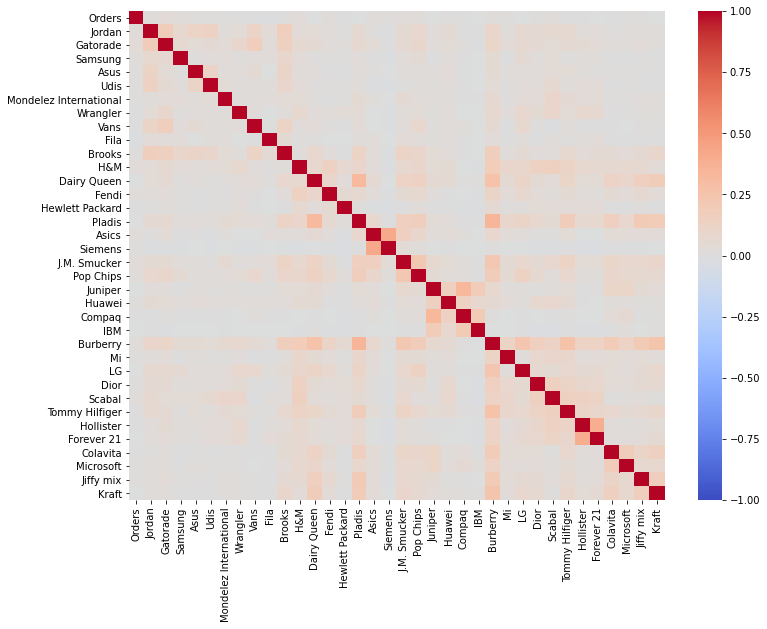

In [283]:
plt.figure(figsize=(12,9))
sns.heatmap(df_new.corr(), vmin=-1, cmap='coolwarm')

In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
# K-means clustering needs the data to be scaled.

df_scale = StandardScaler().fit_transform(df_new)

# K-Means Clustering

In [287]:
from sklearn.cluster import KMeans

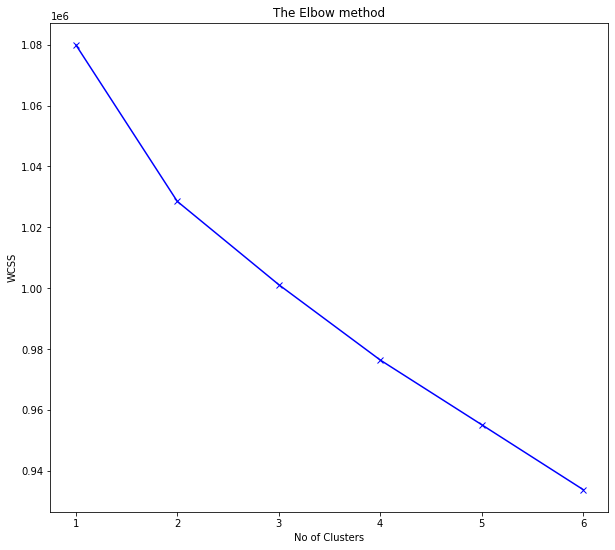

In [289]:
# Finding the number of optimum number of clusters

wcss = []
# An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS).
# WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

plt.figure(figsize=(10,9))

for i in range(1,7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scale)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,7), wcss, 'bx-')
plt.title('The Elbow method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [288]:
# Lets try 2 clusters

In [290]:
kmeans = KMeans(n_clusters=2)

In [291]:
clusters = kmeans.fit_predict(df_scale)

In [292]:
clusters

array([0, 1, 0, ..., 0, 0, 0])

In [293]:
len(clusters)

30000

In [294]:
# Lets add column 'cluster' to the Data

final_clusters = clusters + 1

In [295]:
cluster = list(final_clusters)

In [296]:
df['cluster'] = cluster

In [297]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Order_cat,cluster
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7 to 12 orders,1
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0 order,2
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7 to 12 orders,1
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 order,1
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,7 to 12 orders,2


In [298]:
df.groupby('cluster').mean()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14794.968897,4.137966,0.215107,0.208536,0.190912,0.137667,0.118960,0.118363,0.083862,0.092674,0.085206,0.107050,0.24845,0.100553,0.109477,0.141812,0.038011,0.24845,0.044694,0.64043,0.180308,0.393511,0.210253,0.098312,0.028639,0.232059,0.092525,0.058509,0.199724,0.310096,0.098611,0.047420,0.032709,0.136547,0.087447,0.050668,0.034650
2,16711.045059,4.434742,0.702921,0.616843,0.489434,0.358297,0.348042,0.317899,0.298943,0.267557,0.169671,0.415475,0.99192,1.114667,0.407707,0.321628,0.672778,0.73120,0.076134,1.70665,0.810441,1.114357,0.655376,0.288999,0.059664,2.059043,0.361094,0.468925,0.865444,0.869173,0.661280,0.329397,0.262275,0.655376,0.357054,0.399006,0.372592


In [299]:
df.groupby('cluster').count()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Order_cat
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,26782,24249,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782,26782
2,3218,3027,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218,3218


In [300]:
# The smallest cluster is 2 and the largest cluster is 1

In [301]:
# Lets do PCA for visualization

In [302]:
pca_vars = df.drop(['Gender', 'Order_cat', 'cluster'], axis=1)

In [303]:
from sklearn.preprocessing import StandardScaler
ss_pca = StandardScaler()

In [304]:
pca_df_ss = pd.DataFrame(ss_pca.fit_transform(pca_vars),
                        columns=pca_vars.columns)

In [305]:
pca_df_ss.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-1.731993,0.788301,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-1.731878,-1.161423,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,0.986574,2.419713,0.393100,-0.304147,-0.198739,-0.12087,5.070692,8.097945,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-1.731762,0.788301,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,1.518804,-0.141891,0.194272,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-1.731647,-1.161423,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-1.731531,1.623898,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,0.707974,-0.267321,-0.266358,9.475052,0.625267,-0.141891,1.778876,-0.342359,0.393100,-0.304147,-0.198739,-0.12087,0.520510,-0.253322,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


In [306]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(pca_df_ss.columns))

In [307]:
pca_arr = pca.fit_transform(pca_df_ss)

In [308]:
pca_df = pd.DataFrame(pca_arr)

In [309]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-1.310530,0.101953,0.009977,-0.916934,-0.897014,0.373162,0.997439,-1.482602,-1.170936,-0.921344,-0.558475,-0.326079,0.411353,0.774936,0.389125,0.085661,0.746206,1.064145,0.326012,0.665701,0.555234,-0.039336,-0.620615,0.760551,-0.988992,-0.185912,-0.367051,1.549783,0.680843,-0.320198,0.490951,0.382286,-0.084808,0.212027,0.114327,-0.030792,0.227717
1,3.232383,0.479065,-1.146082,0.501000,0.353411,-2.884713,-0.372937,-3.664774,-1.152586,-1.931669,1.874264,0.297185,2.219648,-1.622143,-1.024953,1.937502,-2.713765,-1.143930,-3.703789,2.663519,-0.018858,-1.091620,-0.845025,-0.229979,0.233496,0.090145,0.611720,-0.743164,-1.127470,0.779483,0.089757,0.554003,0.175097,0.503183,0.797386,-3.800655,1.377861
2,-0.711100,1.097961,-0.623148,-0.729267,0.484369,0.206091,-0.077961,-0.223039,-0.895051,-1.739267,-0.161082,0.024751,-0.358848,0.678960,-0.113981,-0.017937,-0.304240,0.661305,0.429269,-0.496462,0.564553,0.225877,0.477393,-0.050267,0.565535,0.720570,0.677698,0.064340,-0.121585,1.057036,-0.417306,0.154891,-0.499921,0.051469,-0.000117,0.632098,1.029517
3,-1.128886,0.366531,-0.660052,0.145266,-0.319616,-0.224574,0.503300,-0.984530,-0.296091,-0.133453,1.046357,0.682842,0.168417,0.161240,-0.051105,0.587349,0.048966,0.157090,0.305674,-0.597250,0.587423,-0.464070,-0.026430,0.551718,0.003484,-0.436884,-0.284258,-0.475905,-0.337819,0.170547,0.686094,-0.970026,-0.048989,0.000778,0.122862,-0.112297,0.219152
4,4.174545,2.298100,-3.134992,0.711781,-1.276437,0.891600,-1.464561,-1.850404,0.526600,1.407527,-1.742566,-2.158650,1.253128,1.392900,-1.150720,-0.860978,-1.089656,-0.495002,0.480955,-1.119787,1.002584,0.264154,1.162423,0.317604,-1.212474,-0.909459,0.046919,-0.033558,1.979742,-0.355350,0.359641,0.456557,-4.900169,3.713693,0.342587,2.917752,-1.477485


In [310]:
#Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_ * 100

array([8.27859916, 4.48452671, 4.16225549, 3.98780006, 3.76768569,
       3.24998676, 3.03514146, 2.95031366, 2.87301368, 2.82055125,
       2.72675671, 2.6852461 , 2.65259843, 2.63793014, 2.61643185,
       2.59041687, 2.55052018, 2.47198387, 2.43707755, 2.39941264,
       2.39503816, 2.36348015, 2.2915177 , 2.25366345, 2.23378794,
       2.19503357, 2.17923302, 2.1587746 , 2.13218111, 2.09392963,
       2.08436406, 1.98980262, 1.80733646, 1.76032992, 1.62217254,
       1.5588416 , 1.50226521])

In [311]:
np.cumsum(pca.explained_variance_ratio_) * 100

array([  8.27859916,  12.76312587,  16.92538137,  20.91318142,
        24.68086711,  27.93085387,  30.96599533,  33.91630899,
        36.78932267,  39.60987392,  42.33663062,  45.02187673,
        47.67447515,  50.31240529,  52.92883715,  55.51925402,
        58.0697742 ,  60.54175807,  62.97883562,  65.37824827,
        67.77328642,  70.13676657,  72.42828428,  74.68194773,
        76.91573567,  79.11076923,  81.29000226,  83.44877685,
        85.58095796,  87.67488759,  89.75925165,  91.74905427,
        93.55639073,  95.31672065,  96.93889319,  98.49773479,
       100.        ])

In [312]:
pca_2 = pca_df.iloc[:, :2]
pca_2

,0,1
0,-1.310530,0.101953
1,3.232383,0.479065
2,-0.711100,1.097961
3,-1.128886,0.366531
4,4.174545,2.298100
...,...,...
29995,-1.052437,-0.452125
29996,-1.225112,-0.491354
29997,-1.072282,-0.606113
29998,-1.139256,-0.207709


<AxesSubplot:xlabel='0', ylabel='1'>

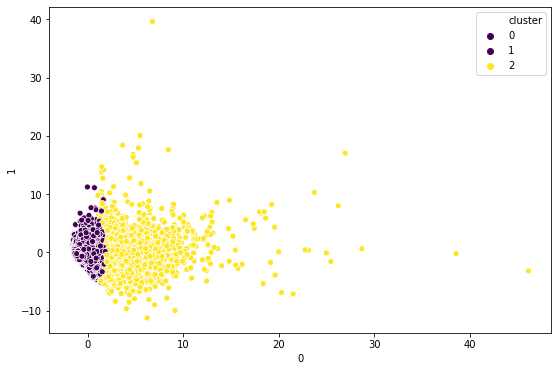

In [313]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=pca_2[0], y=pca_2[1], hue=df['cluster'], palette='viridis')

In [368]:
# Silgouette Score

from sklearn.metrics import silhouette_samples

In [369]:
cluster_labels = np.unique(clusters)

In [371]:
n_clusters = cluster_labels.shape[0]

In [372]:
silhouette_vals = silhouette_samples(df_scale, clusters,
                                    metric='euclidean')

In [373]:
silhouette_vals

array([ 0.40797271, -0.13030702,  0.4169014 , ...,  0.47147737,
        0.51896934,  0.43645979])

In [374]:
from sklearn.metrics import silhouette_score

In [375]:
silhouette_avg = silhouette_score(df_scale, clusters)

In [376]:
silhouette_avg

0.26557833813660486